In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
%matplotlib inline

In [2]:
df = pd.read_csv('merged_data.csv')
df.head()

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
0,49.48,54.06,91.20,48.35,81.45,47.23,60.42,71.84,54.90,67.69,52.25,44.12,50.98
1,41.36,41.99,88.50,47.21,71.80,37.67,44.94,50.60,44.96,62.32,40.87,37.35,43.32
2,38.66,34.01,79.04,55.33,85.97,31.02,38.04,44.08,50.87,55.89,33.82,37.13,57.33
3,36.88,37.33,85.47,104.50,242.98,31.71,36.69,49.85,55.17,54.80,38.37,38.78,43.54
4,34.72,37.95,252.73,88.82,103.63,35.25,32.70,54.73,47.46,56.34,82.25,43.27,39.89


In [3]:
my_array = df.to_numpy()
my_array

array([[ 49.48,  54.06,  91.2 , ...,  52.25,  44.12,  50.98],
       [ 41.36,  41.99,  88.5 , ...,  40.87,  37.35,  43.32],
       [ 38.66,  34.01,  79.04, ...,  33.82,  37.13,  57.33],
       ...,
       [ 83.76,  50.98, 189.  , ...,  76.44,  83.76, 125.58],
       [ 97.42,  48.53, 192.87, ...,  90.85,  91.4 ,  96.21],
       [125.57,  42.65, 170.36, ...,  84.45, 120.8 ,  77.78]])

In [4]:
def generate_cod(n, func_array):
    location = func_array
    location[:, n+1:] = (func_array[:, n+1:]-func_array[:, n][:, None])/(func_array[:, n+1:]+func_array[:, n][:, None])
    location = location[:, n+1:]**2
    COD = pd.DataFrame(np.sqrt(np.mean(location, axis=0)),
                      index= list(df.columns[n+1:]),
                      columns = [df.columns[n]])
    COD.to_csv('cods/'+df.columns[n]+'_COD.csv')
    return COD

In [5]:
generate_cod(0, my_array)

,nakasero_ii(2)
kansanga,0.193314
nansana_east,0.313961
lubaga,0.264078
nansana_west,0.392895
lukuli(2),0.183486
bugolobi,0.180001
kyaliwajjala,0.260395
seguku,0.214542
kiwafu,0.264773
kiwatule,0.248123


In [6]:
#Reading merged csv

In [8]:
merged_cod = pd.read_csv('cods/merged_cod.csv')
merged_cod.rename({'Unnamed: 0':''}, axis=1, inplace=True)
merged_cod.set_index('', inplace=True)
merged_cod.head()

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
,,,,,,,,,,,,,
nakasero_ii(2),0.000000,0.193314,0.313961,0.264078,0.392895,0.183486,0.180001,0.260395,0.214542,0.264773,0.248123,0.185733,0.208601
kansanga,0.193314,0.000000,0.381633,0.324726,0.447994,0.176924,0.143132,0.316708,0.273712,0.234031,0.271510,0.251912,0.249178
nansana_east,0.313961,0.381633,0.000000,0.231169,0.305843,0.317266,0.353529,0.214338,0.252634,0.400962,0.296449,0.244521,0.247128
lubaga,0.264078,0.324726,0.231169,0.000000,0.319769,0.288544,0.316187,0.216462,0.205966,0.341819,0.244453,0.212635,0.234741
nansana_west,0.392895,0.447994,0.305843,0.319769,0.000000,0.412059,0.435540,0.335229,0.341576,0.457755,0.410180,0.330653,0.347193


In [9]:
rounded_cod =merged_cod.round(decimals=3)
rounded_cod.to_csv('coefficient_of_divergence.csv')
rounded_cod

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
,,,,,,,,,,,,,
nakasero_ii(2),0.000,0.193,0.314,0.264,0.393,0.183,0.180,0.260,0.215,0.265,0.248,0.186,0.209
kansanga,0.193,0.000,0.382,0.325,0.448,0.177,0.143,0.317,0.274,0.234,0.272,0.252,0.249
nansana_east,0.314,0.382,0.000,0.231,0.306,0.317,0.354,0.214,0.253,0.401,0.296,0.245,0.247
lubaga,0.264,0.325,0.231,0.000,0.320,0.289,0.316,0.216,0.206,0.342,0.244,0.213,0.235
nansana_west,0.393,0.448,0.306,0.320,0.000,0.412,0.436,0.335,0.342,0.458,0.410,0.331,0.347
lukuli(2),0.183,0.177,0.317,0.289,0.412,0.000,0.152,0.270,0.240,0.263,0.261,0.214,0.168
bugolobi,0.180,0.143,0.354,0.316,0.436,0.152,0.000,0.295,0.264,0.266,0.269,0.231,0.225
kyaliwajjala,0.260,0.317,0.214,0.216,0.335,0.270,0.295,0.000,0.218,0.355,0.243,0.206,0.218
seguku,0.215,0.274,0.253,0.206,0.342,0.240,0.264,0.218,0.000,0.293,0.234,0.185,0.206


In [5]:
def heat_map(df, title):
    import seaborn as sns
    
    plt.figure(figsize=(9,9))
    plt.title(title)
    sns.heatmap(df, cmap='OrRd', linewidth=1)
    plt.savefig('general_COD.png')
    plt.show()

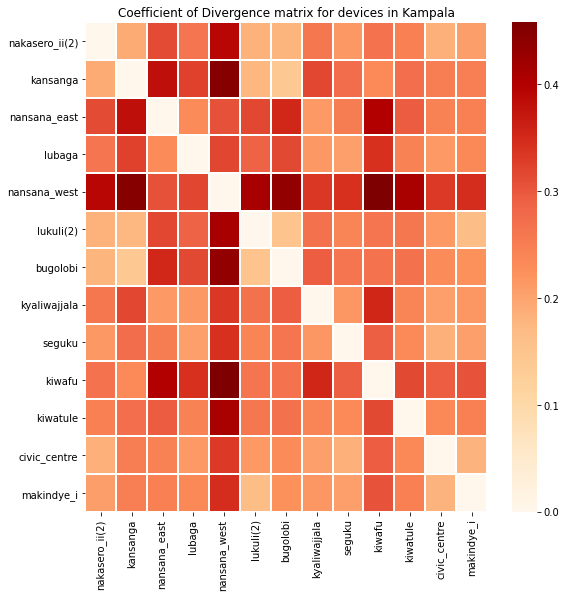

In [6]:
heat_map(rounded_cod, 'Coefficient of Divergence matrix for devices in Kampala')